In [15]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

In [16]:
# file load & merge
directory_path = './final_prpdata_1st/'
file_names = [f for f in os.listdir(directory_path) if f.endswith('.csv')]
file_names = sorted(file_names)
file_names

['df_prp_f_0.csv',
 'df_prp_f_1.csv',
 'df_prp_f_2.csv',
 'df_prp_f_3.csv',
 'df_prp_f_4.csv',
 'df_prp_f_5.csv',
 'df_prp_f_6.csv',
 'df_prp_f_7.csv',
 'df_prp_f_8.csv']

In [18]:
# file load & merge
directory_path = './final_prpdata_1st 2/'
file_names = [f for f in os.listdir(directory_path) if f.endswith('.csv')]
file_names = sorted(file_names)
dataframes = [pd.read_csv(os.path.join(directory_path, file_name)) for file_name in file_names]
df_prpdata_all = pd.concat(dataframes, ignore_index=True)
# f_mode 컬럼 추가
df_best50 = df_prpdata_all.copy()
conditions = [
    (df_best50['hpt_yn'] == 1) & (df_best50['lpt_yn'] == 0) & (df_best50['fan_yn'] == 0) & (df_best50['hpc_yn'] == 0) & (df_best50['lpc_yn'] == 0),
    (df_best50['hpt_yn'] == 1) & (df_best50['lpt_yn'] == 1) & (df_best50['fan_yn'] == 0) & (df_best50['hpc_yn'] == 0) & (df_best50['lpc_yn'] == 0),
    (df_best50['hpt_yn'] == 0) & (df_best50['lpt_yn'] == 0) & (df_best50['fan_yn'] == 1) & (df_best50['hpc_yn'] == 0) & (df_best50['lpc_yn'] == 0),
    (df_best50['hpt_yn'] == 0) & (df_best50['lpt_yn'] == 0) & (df_best50['fan_yn'] == 0) & (df_best50['hpc_yn'] == 1) & (df_best50['lpc_yn'] == 0),
    (df_best50['hpt_yn'] == 0) & (df_best50['lpt_yn'] == 0) & (df_best50['fan_yn'] == 0) & (df_best50['hpc_yn'] == 1) & (df_best50['lpc_yn'] == 1),
    (df_best50['hpt_yn'] == 0) & (df_best50['lpt_yn'] == 1) & (df_best50['fan_yn'] == 0) & (df_best50['hpc_yn'] == 0) & (df_best50['lpc_yn'] == 0),
    (df_best50['hpt_yn'] == 1) & (df_best50['lpt_yn'] == 1) & (df_best50['fan_yn'] == 1) & (df_best50['hpc_yn'] == 1) & (df_best50['lpc_yn'] == 1),
    (df_best50['hpt_yn'] == 0) & (df_best50['lpt_yn'] == 0) & (df_best50['fan_yn'] == 0) & (df_best50['hpc_yn'] == 0) & (df_best50['lpc_yn'] == 0),
]
failurMode = ['hpt', 'hpt+lpt', 'fan', 'hpc', 'hpc+lpc', 'lpt', 'all', 'healthy']
df_best50["f_mode"] = np.select(conditions, failurMode, default='None')

In [19]:
df_best50.shape

(6920, 538)

In [20]:
df_best50['f_mode'].value_counts()

f_mode
healthy    2109
hpt+lpt     987
hpt         823
all         675
fan         672
hpc+lpc     556
hpc         553
lpt         545
Name: count, dtype: int64

In [21]:
featureNamesBest50WANOVA =['climb_hpt_hpc_press_mean',
 'climb_hpt_hpc_press_ratio_mean',
 'climb_hpt_entry_press_ratio_mean',
 'climb_RUL',
 'climb_hpt_hpc_press_min',
 'climb_hpt_hpc_press_ratio_max',
 'cruise_hpt_entry_temp_drop_mean',
 'climb_hpt_entry_press_ratio_max',
 'climb_hpt_entry_temp_drop_mean',
 'cruise_hpt_hpc_press_mean',
 'cruise_hpt_entry_press_ratio_mean',
 'cruise_hpt_hpc_press_ratio_mean',
 'climb_hpt_hpc_temp_mean',
 'climb_hpt_hpc_temp_ratio_mean',
 'cruise_hpt_entry_press_ratio_max',
 'cruise_hpt_hpc_press_min',
 'cruise_hpt_hpc_press_ratio_max',
 'cruise_SmHPC_mean',
 'climb_hpt_entry_press_ratio_min',
 'climb_hpt_hpc_press_ratio_min',
 'climb_hpt_hpc_press_max',
 'climb_fan_exit_press_min',
 'climb_P50_std',
 'climb_hpt_entry_temp_drop_min',
 'climb_SmHPC_mean',
 'climb_SmFan_mean',
 'climb_SmLPC_max',
 'climb_Mach_std',
 'climb_hpc_lpc_temp_max',
 'climb_hpc_lpc_temp_ratio_max',
 'climb_alt_min',
 'cruise_hpt_hpc_temp_ratio_mean',
 'cruise_hpt_hpc_temp_mean',
 'climb_T30_max',
 'climb_hpt_hpc_temp_max',
 'climb_P2_std',
 'cruise_SmLPC_mean',
 'climb_hpt_entry_temp_drop_max',
 'climb_P21_std',
 'climb_P15_std',
 'cruise_hpt_entry_temp_drop_min',
 'climb_W22_std',
 'climb_W25_std',
 'climb_W31_std',
 'climb_W32_std',
 'climb_W50_std',
 'climb_W48_std',
 'climb_P40_std',
 'climb_P30_std',
 'climb_Ps30_std']

add_featureNamesBest50WANOVA = featureNamesBest50WANOVA.copy()
# add_featureNamesBest50WANOVA.append('fileNo')
add_featureNamesBest50WANOVA.append('unit')
add_featureNamesBest50WANOVA.append('cycle')

In [22]:
ds01_test_unitNo = ((df_best50.fileNo == 0) & (df_best50.unit.isin([7,8,9,10])))
ds02_test_unitNo = ((df_best50.fileNo == 1) & (df_best50.unit.isin([11,14,15])))
ds03_test_unitNo = ((df_best50.fileNo == 2) & (df_best50.unit.isin([10,11,12,13,14,15])))
ds04_test_unitNo = ((df_best50.fileNo == 3) & (df_best50.unit.isin([7,8,9,10])))
ds05_test_unitNo = ((df_best50.fileNo == 4) & (df_best50.unit.isin([7,8,9,10])))
ds06_test_unitNo = ((df_best50.fileNo == 5) & (df_best50.unit.isin([7,8,9,10])))
ds07_test_unitNo = ((df_best50.fileNo == 6) & (df_best50.unit.isin([7,8,9,10])))
ds08a_test_unitNo = ((df_best50.fileNo == 7) & (df_best50.unit.isin([10,11,12,13,14,15])))
ds08c_test_unitNo = ((df_best50.fileNo == 8) & (df_best50.unit.isin([7,8,9,10])))

# 데이터 준비
train_set = df_best50.loc[~(ds01_test_unitNo | ds02_test_unitNo | ds03_test_unitNo | ds04_test_unitNo | ds05_test_unitNo | ds06_test_unitNo | ds07_test_unitNo | ds08a_test_unitNo | ds08c_test_unitNo)]
test_set = df_best50.loc[(ds01_test_unitNo | ds02_test_unitNo | ds03_test_unitNo | ds04_test_unitNo | ds05_test_unitNo | ds06_test_unitNo | ds07_test_unitNo | ds08a_test_unitNo | ds08c_test_unitNo)]

train_set = train_set.loc[train_set.unit != 0]
test_set = test_set.loc[test_set.unit != 0]

# print(train_set.f_mode.value_counts())
# print(test_set.f_mode.value_counts())

In [25]:
X_full_train = train_set.drop('f_mode', axis=1)[add_featureNamesBest50WANOVA].reset_index(drop=True)
y_full_train = train_set['f_mode'].reset_index(drop=True)
X_full_test = test_set.drop('f_mode', axis=1)[add_featureNamesBest50WANOVA].reset_index(drop=True)
y_full_test = test_set['f_mode'].reset_index(drop=True)

# 데이터 전처리_Scaling 준비
scaler = MinMaxScaler()
scaler.fit(X_full_train[featureNamesBest50WANOVA])

X_train_scaled = scaler.transform(X_full_train[featureNamesBest50WANOVA])
X_test = scaler.transform(X_full_test[featureNamesBest50WANOVA])

              precision    recall  f1-score   support

         all       0.85      0.77      0.81       261
         fan       0.90      0.88      0.89       265
     healthy       0.85      0.84      0.85       855
         hpc       0.90      0.89      0.89       215
     hpc+lpc       0.87      0.86      0.86       222
         hpt       0.90      0.89      0.90       230
     hpt+lpt       0.81      0.92      0.87       408
         lpt       0.96      0.91      0.94       231

    accuracy                           0.87      2687
   macro avg       0.88      0.87      0.87      2687
weighted avg       0.87      0.87      0.87      2687



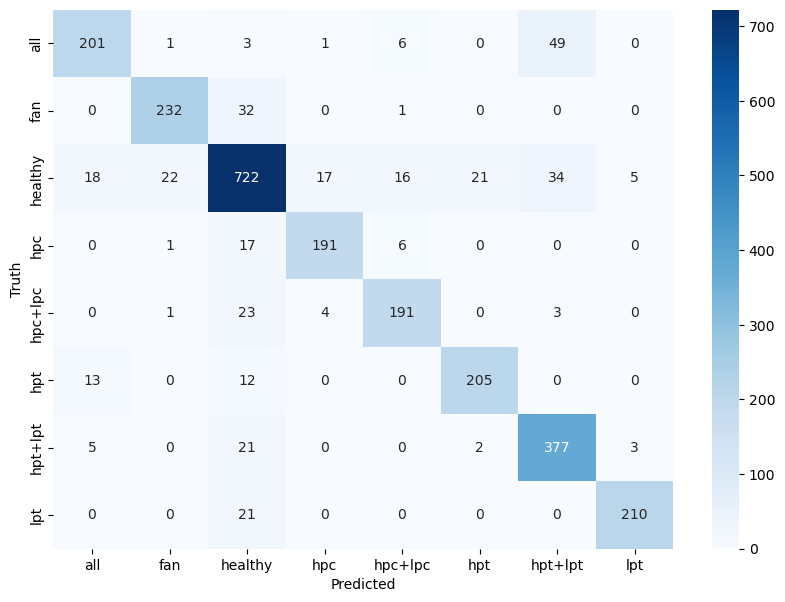

In [28]:

# 모델 학습 {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}
model = SVC(C=100.0, gamma='scale', kernel='rbf')
model.fit(X_train_scaled, y_full_train)

# 예측 및 평가:
predictions = model.predict(X_test)
print(classification_report(y_full_test,predictions))


# f_mode 클래스 
f_mode_category = ['all', 'fan', 'healthy', 'hpc', 'hpc+lpc', 'hpt', 'hpt+lpt', 'lpt']
df_best50['f_mode'] = pd.Categorical(df_best50['f_mode'], categories=f_mode_category, ordered=True)
class_names = df_best50['f_mode'].cat.categories

# confusion matrix 생성 
cm = confusion_matrix(y_full_test,predictions)

# Heatmap으로 시각화  
plt.figure(figsize=(10,7))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
